# Regression


# 1. Information Generation 
Simulation of values to train and test the linear regression model.

In [1]:
# importing packages
import numpy
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# setting ageNetWorthData
def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65))
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]

    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

# using ageNetWorthData
ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2. ages_train vs ages_test relationship
 
 Is there a trend we can model ?


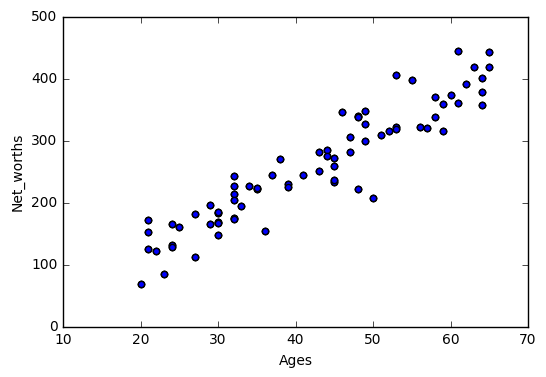

In [4]:
# Plot ages_train vs net_worths_train
plt.scatter(ages_train,net_worths_train)

# Setting axis labels
plt.xlabel('Ages')
plt.ylabel('Net_worths')

plt.show()

# 3. Model Creation and Predictions

Model fitting:  $y = a + bx$

parameters: $a,b$

Independent variable: $x$

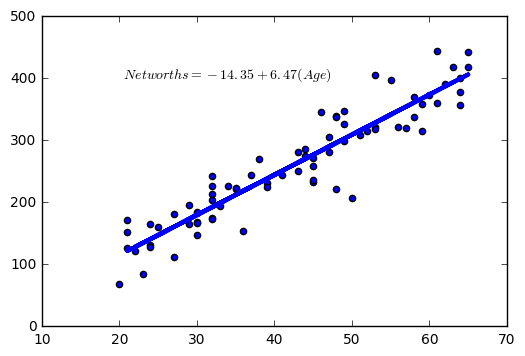

In [14]:
%matplotlib inline

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(ages_train,net_worths_train)
plt.plot(ages_test, reg.predict(ages_test), color='blue',linewidth=3)

intercep = reg.intercept_
slope = reg.coef_

ax.text(20, 400, r' $Net worths =' + str(round(intercep.item(0),2)) +' + ' 
                                   + str(round(slope.item(0),2)) + '(Age) $', fontsize=10)


# Validation

1. R^2
2. Sum squares residuals (SSR)
3. AIC, BIC